# Loan Payments Data

#### 참고 사이트 : https://redhorse046.tistory.com/15

## 단계

1. 데이터 분석 세팅
2. 데이터 탐색
3. 데이터 전처리
4. 모델링

## 1. 데이터 분석 세팅

#### import 패키지

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


#### 필요한 함수 정의

In [40]:
def train_test_diff(train_df_, test_df_, cols):
    
    """ train, test를 각 열 별로 concat 하여 합친 뒤, row로 각 value_counts를 나눈 값을 기준으로
        각 값을 train - test하여 남은 값을 기준으로 train 또는 test로 치우친 정도를 계산함
         -> 비대칭도와 비슷하다고 볼 수 있음.
        
    Parameters
    ----------
    
    train_df_ : pandas(data_frame)_like, shape (n_samples, n_features)
                Training data
                
    test_df_ : pandas(data_frame)_like, shape (n_samples, n_features)
               Test data
               
    cols : list_like,
           columns name list of n_features in train_df_ and test_df_
               
    
    Returns
    -------
    result : pandas(data_frame)_like, shape (n_features,)
             each values of each train_group_value- test_group_value
    
    """
    
    print('\n')
    print('-------------------------------------------------------------------------------------------------------------------------')
    print(f'{cols} distribution graph')
    print('\n')
    
    result = pd.concat([train_df_[cols].value_counts()/train_df_.shape[0], test_df_[cols].value_counts()/test_df_.shape[0]], axis=1)
    result.columns = ['train_v','test_v']
    result['diff'] = result['train_v'] - result['test_v']
    print(result)
    
    return result

# category 변수에 대하여 target 변수와 train으로 분류한 함수.
def category_dist(train_df_, cols, target_v='price'):
    print('\n')
    print('--------------------------------------------------------------')
    print(f'{cols} distribution')
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    for i in sorted(train_df_[cols].unique()):
        sns.distplot(train_df_.loc[train_df_[cols]==i, target_v], ax=ax[0])
    ax[0].legend(sorted(train_df_[cols].unique()))
    ax[0].set_title(f'{cols} {target_v} distribution')

    sns.boxplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    ax[1].set_title(f'{cols} vs {target_v}')
    
    plt.show()


# category 변수의 train과 test 데이터의 분포 차를 보여주는 함수.
def category_dist_TT(train_df_, test_df_, cols):
    
    
    result = pd.concat([train_df_[cols].value_counts()/train_df_.shape[0], test_df_[cols].value_counts()/test_df_.shape[0]], axis=1)
    result.columns = ['train_df_','test_df_']
    
    result.fillna(0, inplace=True)
    
    plt.figure(figsize=(15,8))
    sns.distplot(result['train_df_'], label='train')
    sns.distplot(result['test_df_'], label='test')
    plt.legend()
    plt.show()
    
    return result


# numerical 변수의 train데이터에 대한 분포를 보여주는 함수.
def t_category_continous_dist(train_df_, cols, target_v='price'):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    sns.distplot(train_df_[cols], ax=ax[0])
    ax[0].set_title(f'{cols} - distribution')
    
    sns.scatterplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    sns.regplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    ax[1].set_title(f'{cols} - {target_v} scatterplot')
    
    plt.show()


# numerical 변수의 train과 test 데이터의 분포 차를 보여주는 함수입니다.
def continous_dist_TT(train_df_, test_df_, cols, target_v='price'):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    sns.distplot(train_df_[cols], ax=ax[0])
    sns.distplot(test_df_[cols], ax=ax[0])
    ax[0].set_title(f'{cols} - train/test distribution')
    
    sns.scatterplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    sns.regplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    ax[1].set_title(f'{cols} - {target_v} scatterplot')
    
    plt.show()


# 격자를 넣어서 scatter를 표현함.
def scatter_quantile_visualize(df_, col1, col2):
    col1_quant = np.arange(0,1.1,0.1)
    col2_quant = np.arange(0,1.1,0.1)

    for quantile_value in df_[col1].quantile(col1_quant):
        plt.axvline(quantile_value, color='red', alpha=0.3)
    for quantile_value in df_[col2].quantile(col2_quant):
        plt.axhline(quantile_value, color='blue', alpha=0.3)
        
    sns.scatterplot(col1, col2, hue='price',data=df_)
    
    plt.title('{} - {}'.format(col1,col2))
    plt.show()

    

   
    
    
    
    
def check_proportion(df_, cols_list, index_num):
    
    
    """
    *** 현재 column의 값이 상위 몇 %에 있는지 검사함
    input
    df_ : 데이터프레임
    cols_list : target column list
    index_num : 목표 인덱스 번호
    
    return
    result : 숫자로 각 column의 상위 몇 %에 있는지 나타냄.
    """    
    for col in cols_list:
        target = df_.loc[index_num, col]
        result = (target-df_[col].min())/(df_[col].max() - df_[col].min())
        
        print(f'{col} : {result}')
        

        
# -----------------------------------------------------------------------------
def bar_chart(df_, feature, ax_v=None):
    collection_paidoff = df_[df_['loan_status'] == 'COLLECTION_PAIDOFF'][feature].value_counts()
    collection = df_[df_['loan_status'] ==  'COLLECTION'][feature].value_counts()
    paidoff = df_[df_['loan_status'] == 'PAIDOFF' ][feature].value_counts()
    df=pd.DataFrame([collection_paidoff, collection, paidoff])
    df.index = ['COLLECTION_PAIDOFF(0)', 'COLLECTION(1)', 'PAIDOFF(2)']
    if isinstance(ax_v, type(None)) == False:
        df.plot(kind='bar', stacked=True, ax=ax_v)
    else : 
        df.plot(kind='bar', stacked=True)


def x_feature_bar_chart(df_, feature, ax_v=None):
    feature_uni_v = df_[feature].unique().tolist()
    plot_df = pd.DataFrame()
    
    for f in feature_uni_v:
        plot_df[f] = df_[df_[feature] == f]['loan_status'].value_counts()
    plot_df = plot_df.T
    plot_df.fillna(0, inplace=True)
    if isinstance(ax_v, type(None)) == False:
        plot_df.plot(kind='bar', stacked=True, ax=ax_v)
    else : 
        plot_df.plot(kind='bar', stacked=True)


def category_graph(df_, feature):
    print('----------------------------------------------------------')
    print(f'{feature} graph!!!')
    fig, ax = plt.subplots(2, 2, figsize=(20,12))
    
    sns.countplot(x=feature, data=df, palette='Set2', ax=ax[0,0])
    ax[0,0].set_title(f'{feature} distribution')

    bar_chart(df_, feature, ax[0,1])
    ax[0,1].set_title(f'loan_status - {feature} distribution')
    
    x_feature_bar_chart(df_, feature, ax[1,0])
    
    plt.show()
    

def continue_graph(df_, feature, sub_feature=None):
    print('----------------------------------------------------------')
    print(f'{feature} graph!!!')
    fig, ax = plt.subplots(2, 2, figsize=(20,12))
    
    df[feature].hist(ax=ax[0,0])
    ax[0,0].set_title(f'{feature} distribution')
    sns.boxplot(x='loan_status', y=feature, data=df, ax=ax[0,1])
    ax[0,1].set_title(f'loan_status - {feature} boxplot')
    
    if isinstance(sub_feature, type(None)) == False:
        sns.boxplot(x='loan_status', y=feature, data=df, ax=ax[1,0],
                    hue=sub_feature)
    ax[1,0].set_title(f'{feature} and {sub_feature} - loan_status boxplot')
    
    plt.show()

#### 데이터 불러오기

In [57]:
data = pd.read_csv('./data/Loan_payments_data.csv')

## Data 탐색

#### Variable Description : 자세한 사항은 Loan Data_Description(2019.05.19).xlsx 참조

* Loan_ID	: 대출한 고객의 고유한 ID
* loan_status : 타겟 변수, 상환 여부를 나타냄 -> 타겟 변수
* Principal : 고객이 대출받은 금액
* terms : 대출금 지급까지 걸린 기간
* effective_date : 실제 계약 효과가 발휘하기 시작한 날짜
* due_date : 대출금 납부 기한 날짜
* paid_off_time : 고객이 은행에 모두 상환한 날짜, 시간 -> 타겟 변수를 알아야 쓸 수 있는 데이터이므로 쓰지 않음.
* past_due_days : 고객이 은행에 대출금을 모두 상환하는데 걸린 기간 -> 타겟 변수를 알아야 쓸 수 있는 데이터이므로 쓰지 않음.
* age : 고객의 나이
* education : 고객의 교육 수준
* Gender : 고객의 성별

#### Data 구조

In [60]:
# 데이터 shape
print(f'data shape : {data.shape}')

data shape : (500, 11)


In [61]:
# paid_off_tijme, past_due_days를 제외하면 null값 없음 -> 쓰지 않으므로 삭제함.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


In [62]:
# 열 제거
data.drop(['paid_off_time', 'past_due_days'], axis=1, inplace=True)

In [63]:
# Principal : 평균이 오른쪽으로 치우쳤음 -> mean이 max값에 가까움.
# terms : 평균이 오른쪽으로 치우쳤음 -> mean이 max값에 가까움.
# age : 평균이 골고루 분포 되었음.

data.describe()

,Principal,terms,age
count,500.000000,500.000000,500.000000
mean,943.200000,22.824000,31.116000
std,115.240274,8.000064,6.084784
min,300.000000,7.000000,18.000000
25%,1000.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


#### column 별 분석

Loan_ID

In [64]:
# Loan_ID
data['Loan_ID'].head()

0    xqd20166231
1    xqd20168902
2    xqd20160003
3    xqd20160004
4    xqd20160005
Name: Loan_ID, dtype: object

In [65]:
# key 값으로 쓸 수 있음 : unique_value = 총 데이터 크기
len(data['Loan_ID'].unique())

500

loan_status : categorical 변수(target 변수)

In [66]:
data['loan_status'].head()

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [67]:
# 3종류로 나뉨
data['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

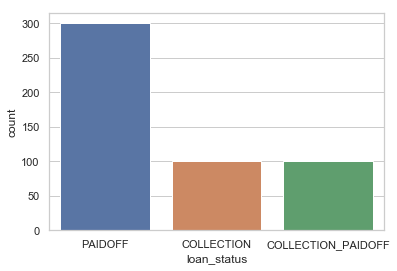

In [68]:
# PAIDOFF이 높은 것을 볼 수 있음. -> 소액대출은 거의 이루어지지 않음.
sns.countplot(x='loan_status', data=data)

Principal

* 800 ~ 1000에 금액이 몰림.
* 0 : COLLECTION, 1 : COLLECTION_PAIDOFF, 2 : paidoff

----------------------------------------------------------
Principal graph!!!


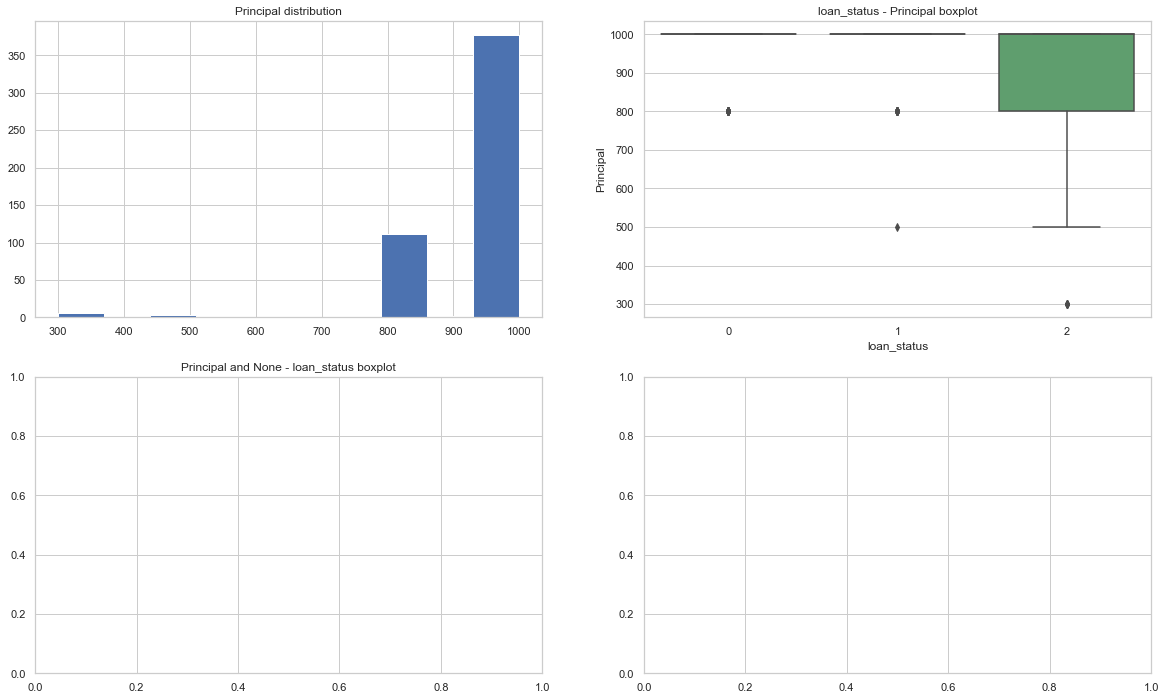

In [72]:

continue_graph(data, 'Principal')

terms 
* 장기 대출이 많음
* loan_status는 고르게 분포됨

----------------------------------------------------------
terms graph!!!


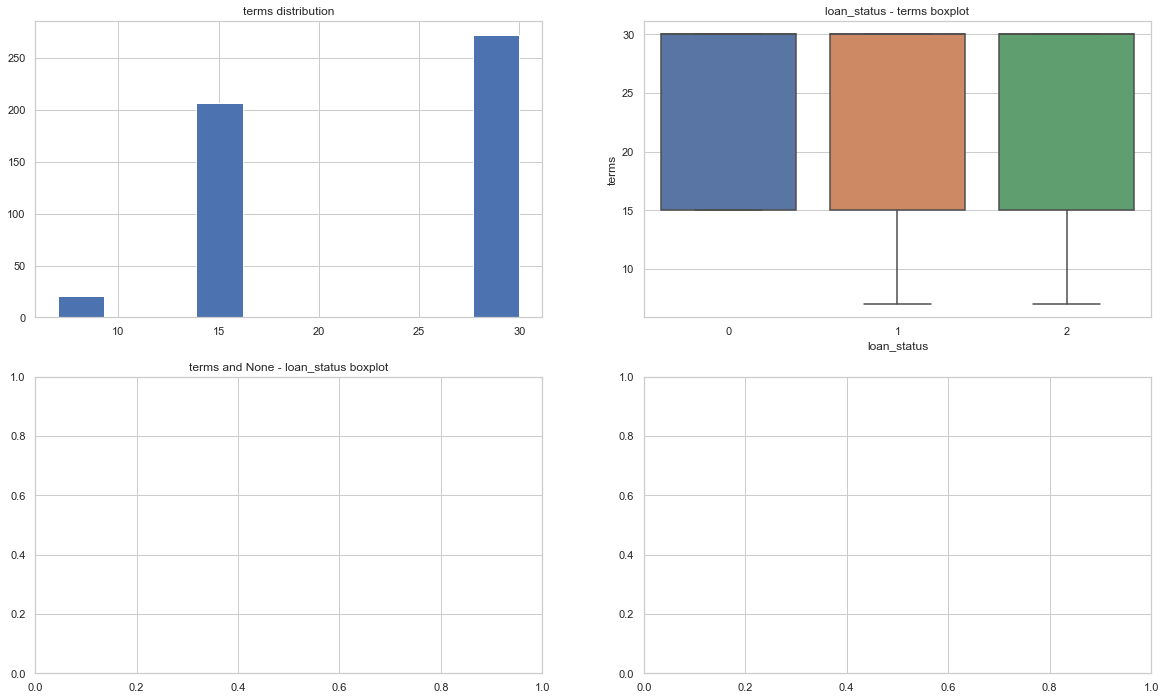

In [73]:
continue_graph(data, 'terms')

effective_date
* 7개로 나뉘어 있음 -> 일수만 따로 빼서 8~14까지로 데이터 변경 가능
* 9/11/2016에 데이터가 많음
* COLLECTION, COLLECTION_PAIDOFF의 경우 일부만 가지고 있음

In [75]:
data['effective_date'].unique()

array(['9/8/2016', '9/9/2016', '9/10/2016', '9/11/2016', '9/12/2016',
       '9/13/2016', '9/14/2016'], dtype=object)

----------------------------------------------------------
effective_date graph!!!


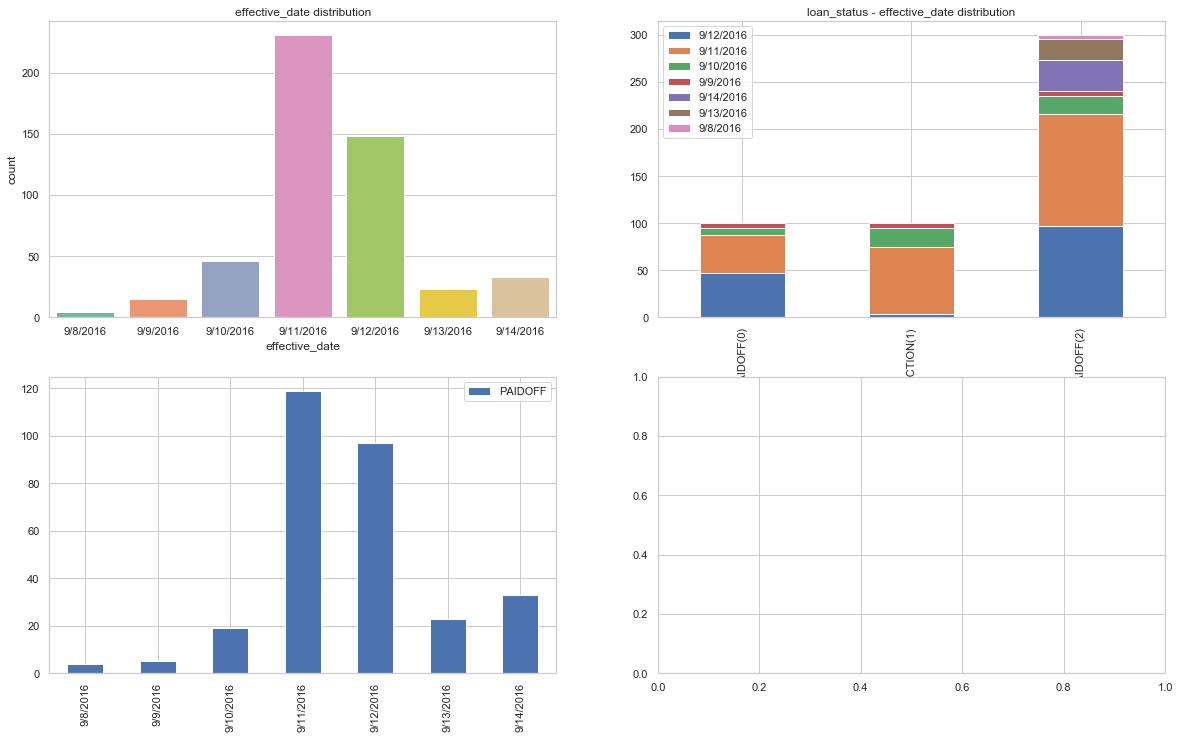

In [76]:
category_graph(data, 'effective_date')

due_date
* 25개로 나뉨

In [79]:
data['due_date'].unique()

array(['10/7/2016', '9/22/2016', '10/8/2016', '9/15/2016', '9/24/2016',
       '9/16/2016', '10/9/2016', '10/10/2016', '9/25/2016', '9/17/2016',
       '11/9/2016', '10/25/2016', '9/18/2016', '9/26/2016', '10/26/2016',
       '10/11/2016', '11/10/2016', '9/19/2016', '10/12/2016', '9/27/2016',
       '9/28/2016', '10/13/2016', '11/12/2016', '9/23/2016', '11/7/2016'],
      dtype=object)

----------------------------------------------------------
due_date graph!!!


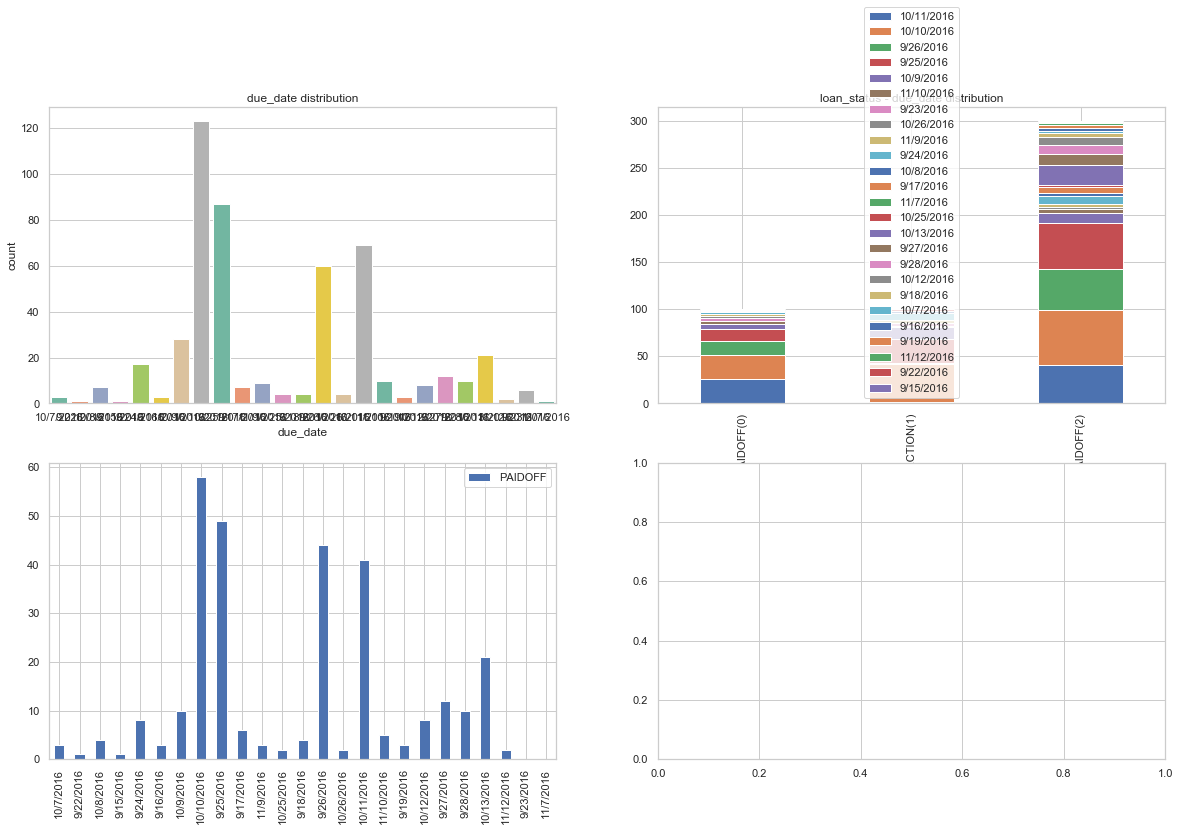

In [80]:
category_graph(data, 'due_date')

age
* 고르게 분포 되어있음

----------------------------------------------------------
age graph!!!


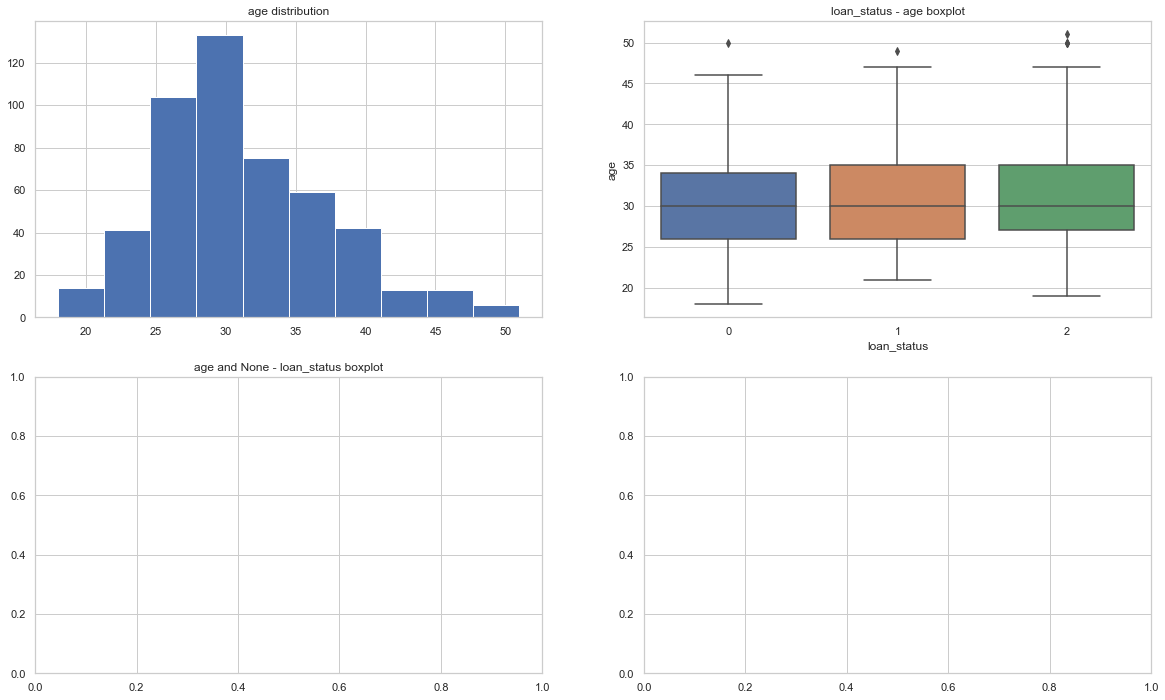

In [81]:
continue_graph(data, 'age')

education
* High School, College가 제일 많음
* Master or Above의 경우 PAIDOFF에만 있음
* 그외 변수는 타겟변수에 대해 전체적으로 고르게 분포함

----------------------------------------------------------
education graph!!!


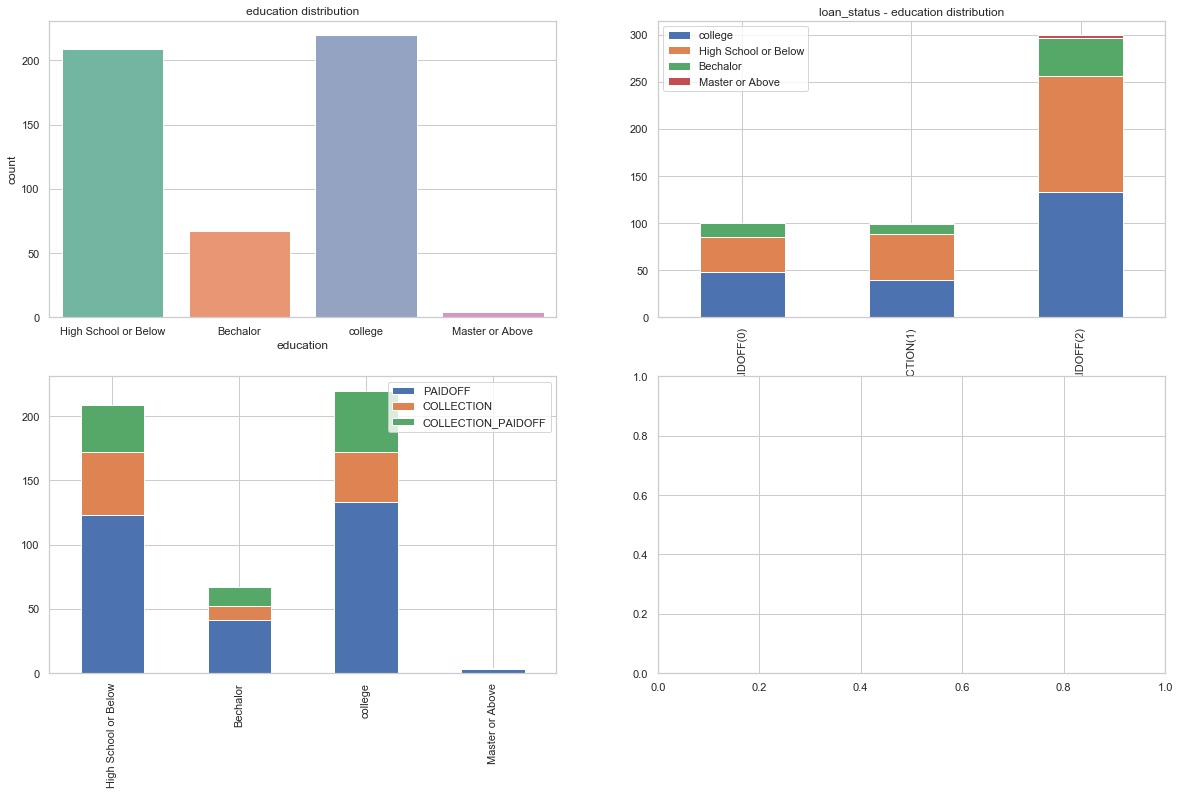

In [84]:
category_graph(data, 'education')

Gender
* 남성이 많음
* 여성 비율이 PAIDOFF에서 조금 높게 나타남

----------------------------------------------------------
Gender graph!!!


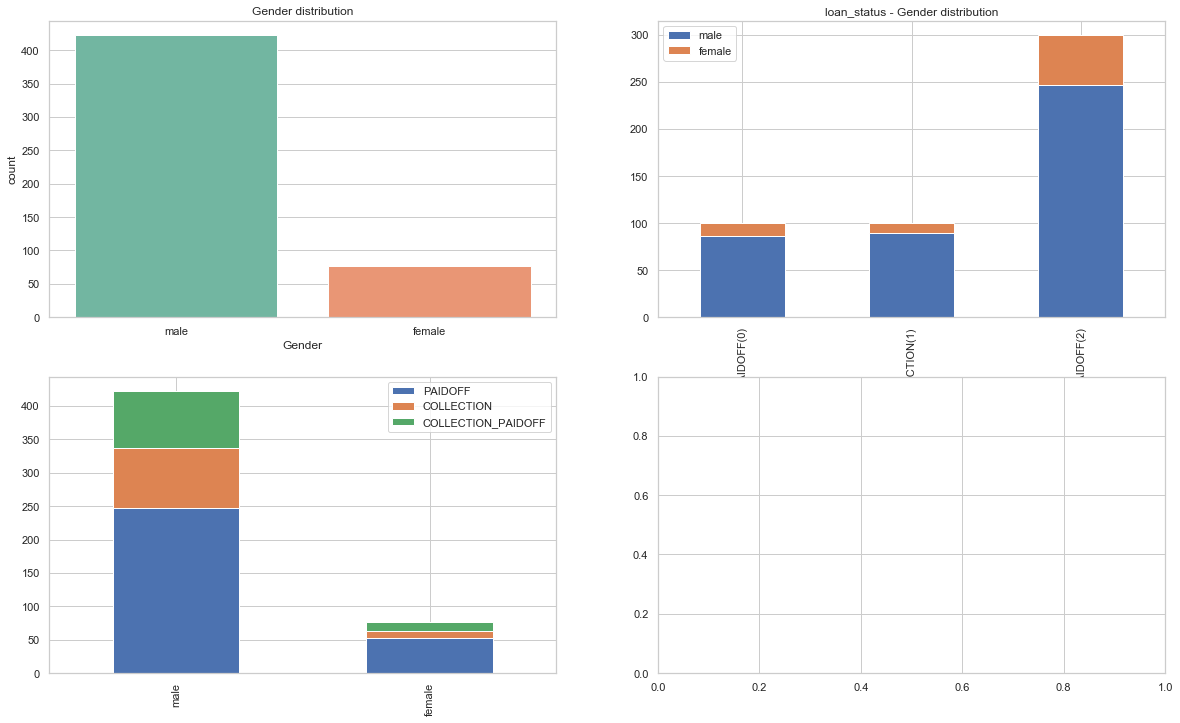

In [85]:
category_graph(data, 'Gender')

----------------------------------------------------------
Principal graph!!!


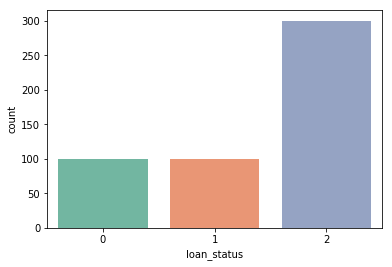

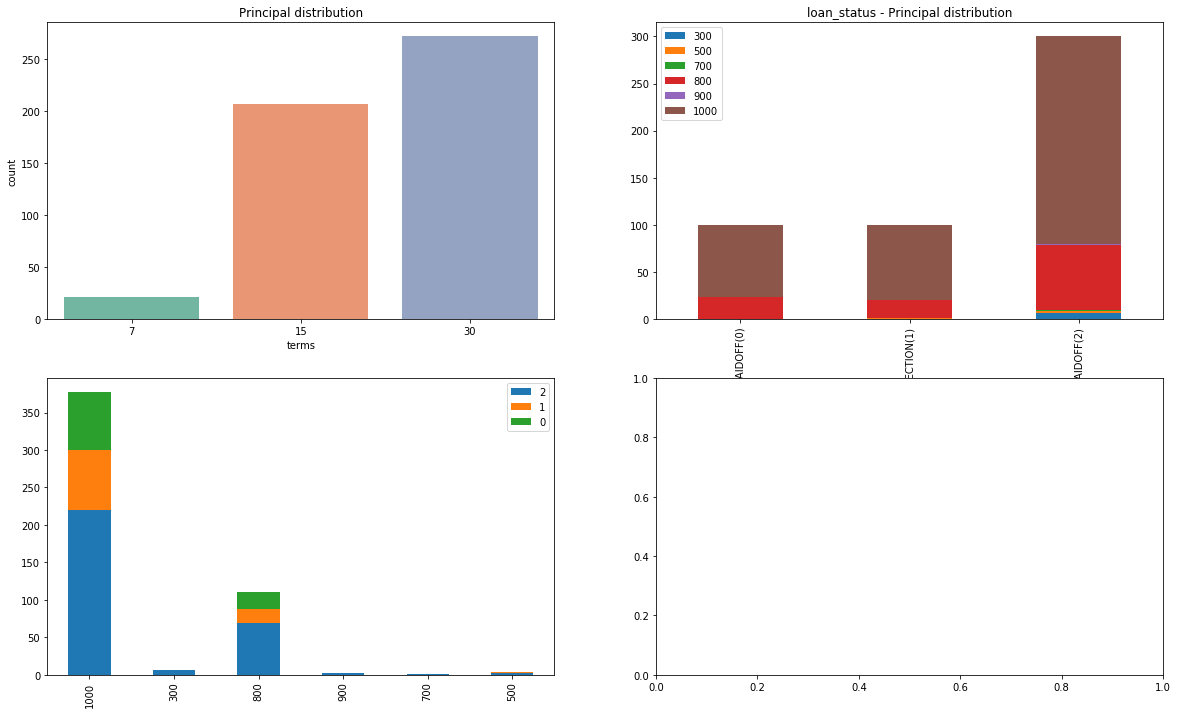

----------------------------------------------------------
terms graph!!!


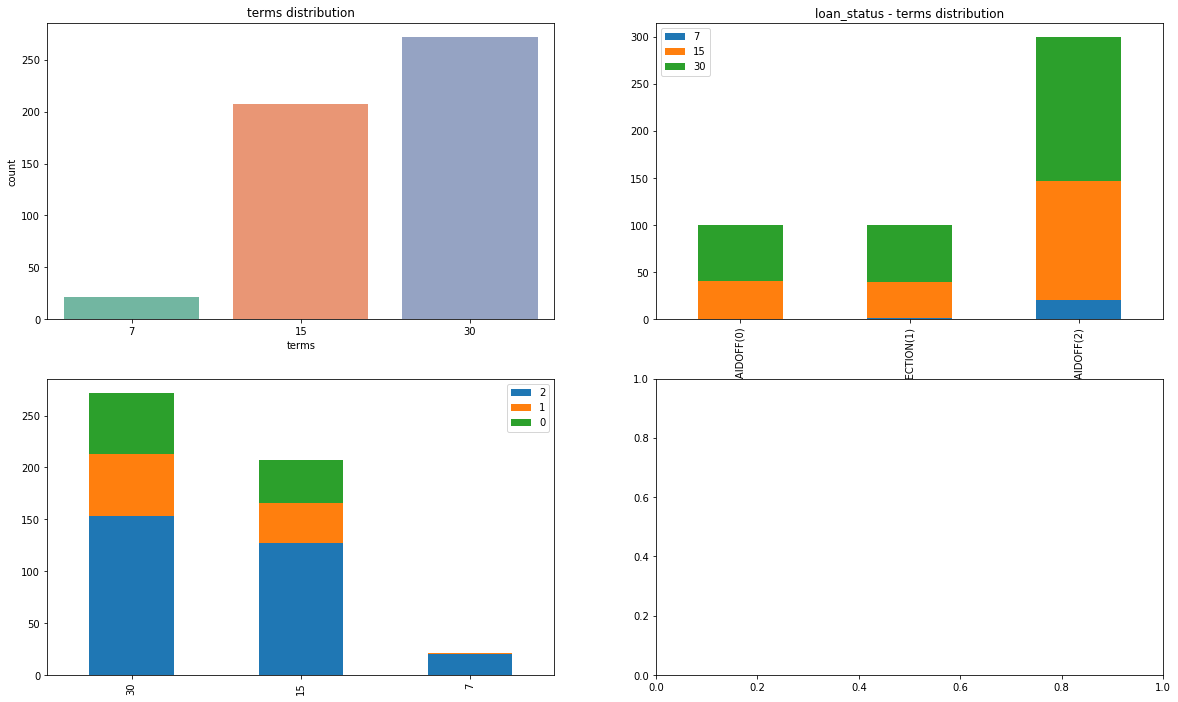

----------------------------------------------------------
education graph!!!


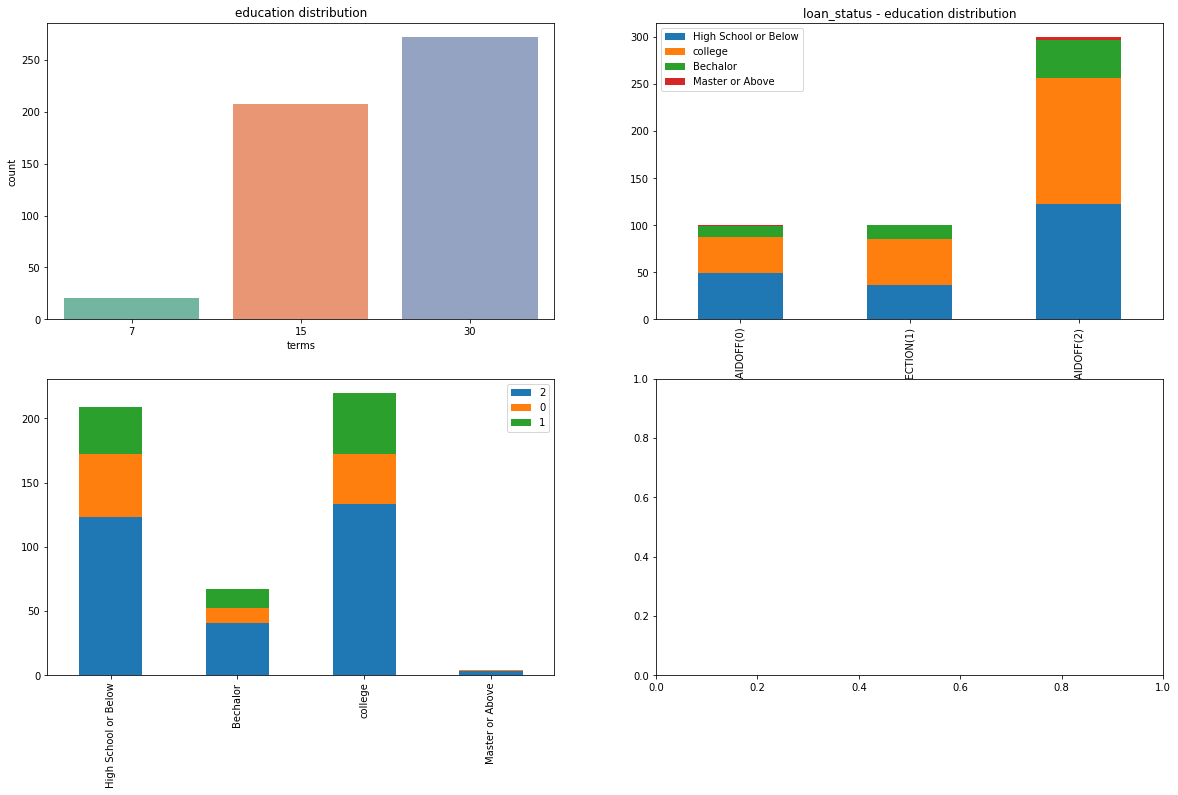

----------------------------------------------------------
Gender graph!!!


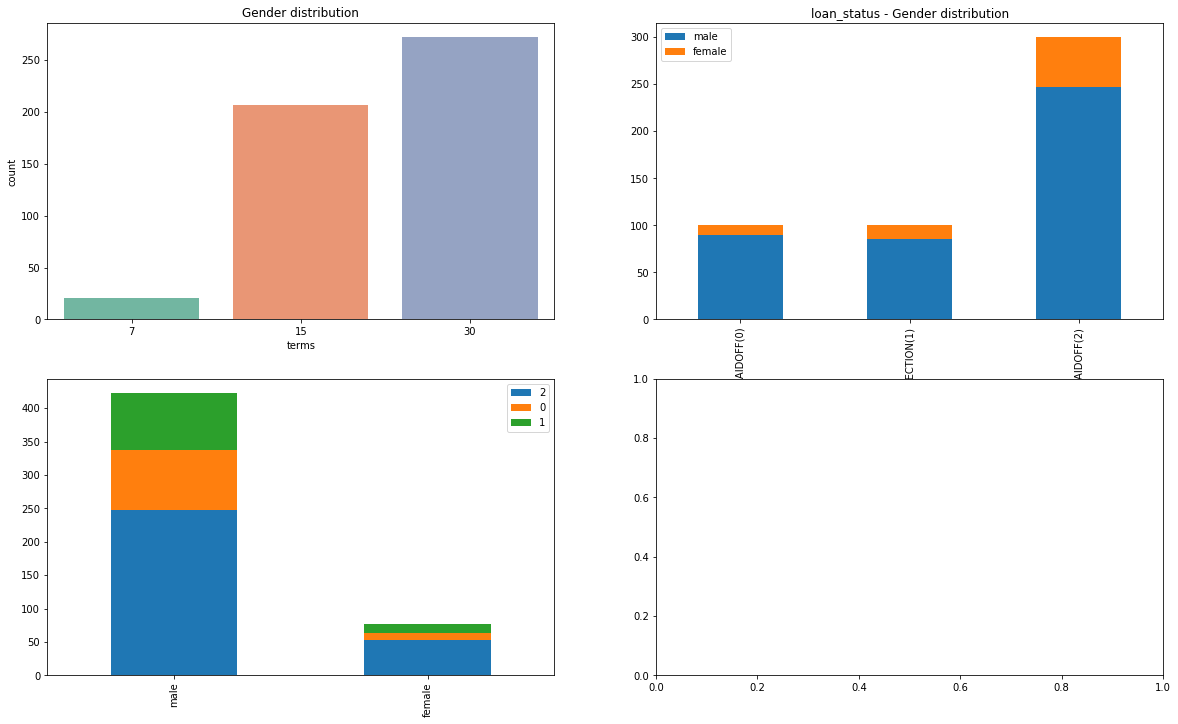

----------------------------------------------------------
Principal graph!!!


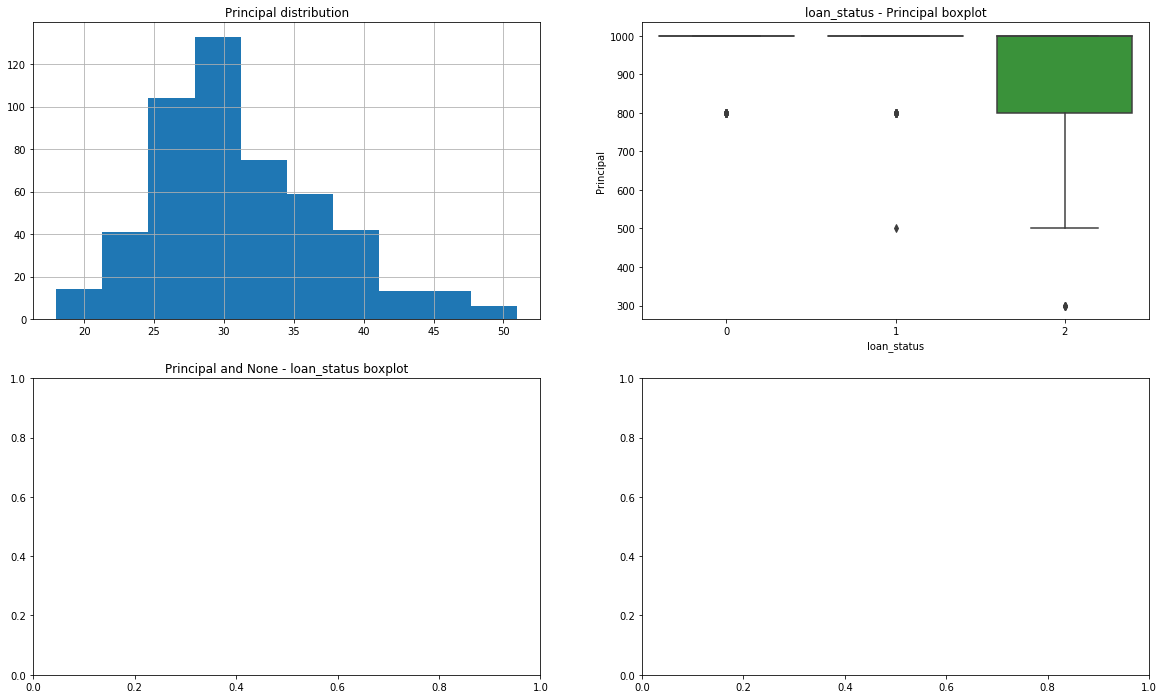

----------------------------------------------------------
age graph!!!


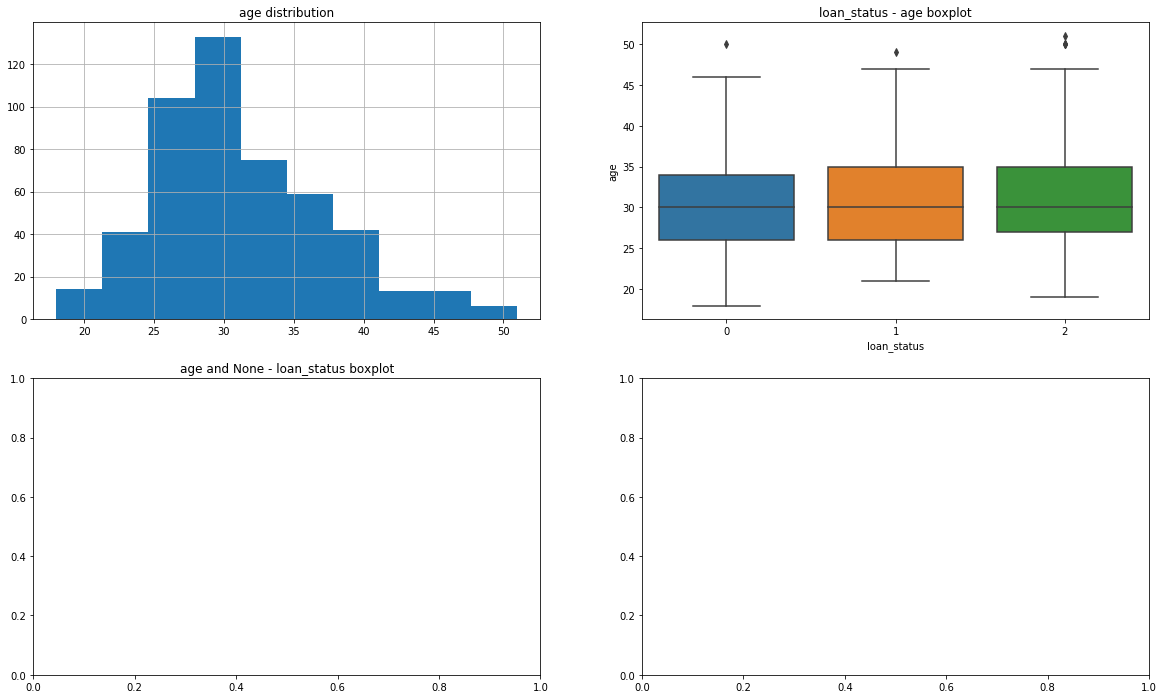

----------------------------------------------------------
date : due_date graph!!!


D:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


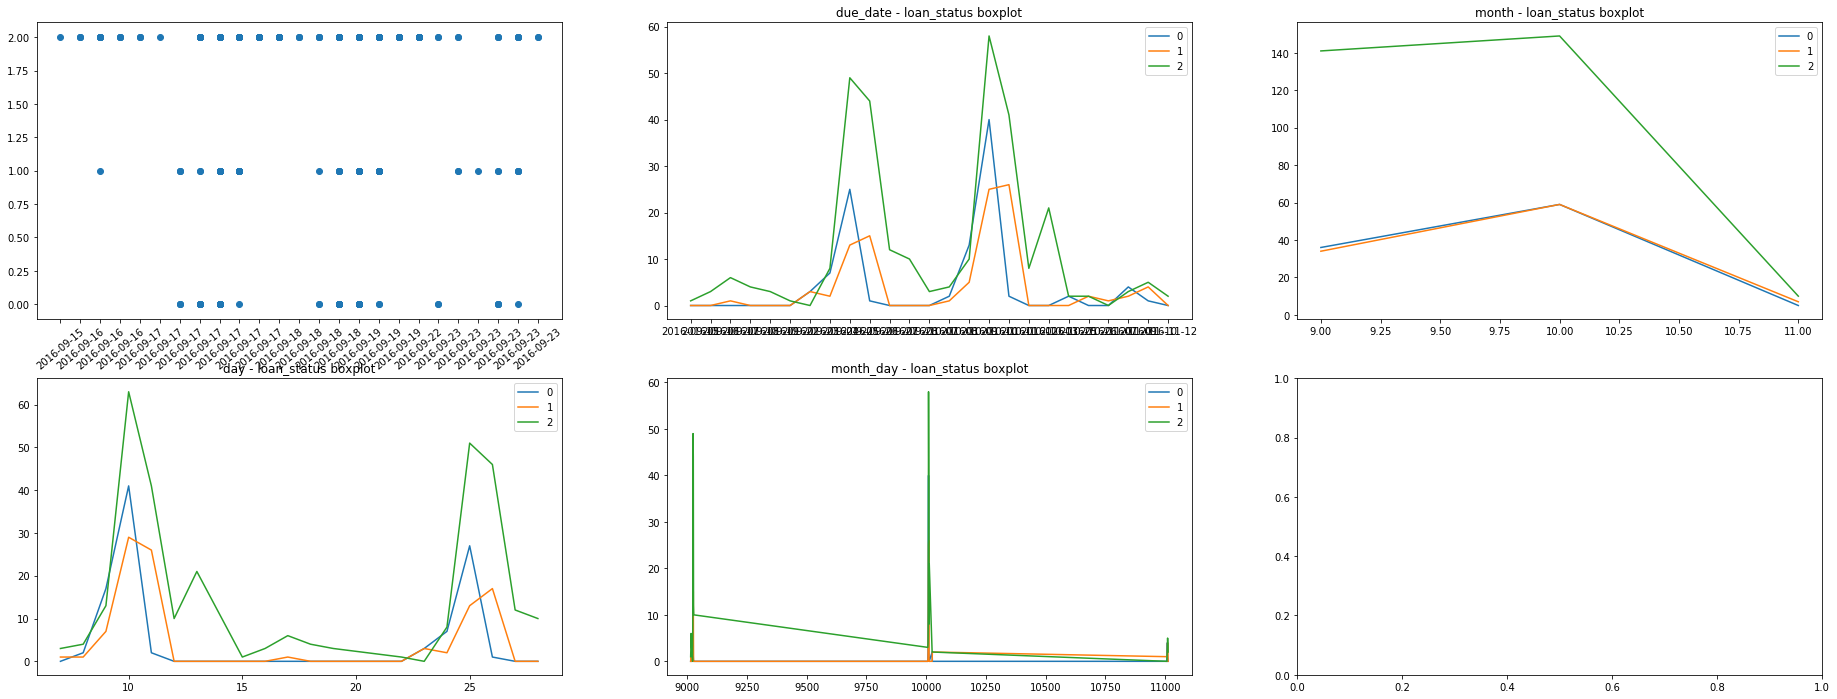

'\n            # 날짜 데이터\n                # 1. 전체 날짜\ndate_df = df[[\'due_date\', \'loan_status\']]\ndate_df.loc[:,\'due_date\'] = pd.to_datetime(date_df[\'due_date\'])\ndate_df = date_df.sort_values(\'due_date\')\ndate_df.loc[:,\'due_date\'] = date_df[\'due_date\'].astype(\'str\')\nplt.figure(figsize=(22,10))\nx_ = date_df[\'due_date\']\ny_ = date_df[\'loan_status\']\nplt.scatter(x_, y_)\nplt.xticks(x_, rotation=40)\nplt.show()\n\n\ngroup_by_df = date_df.groupby([\'due_date\',\'loan_status\']).size().unstack(fill_value=0).stack().reset_index()\ngroup_by_df.columns = [\'due_date\',\'loan_status\',\'value\']\nplt.figure(figsize=(22,10))\nfor i in date_df[\'loan_status\'].unique():\n    target_df = group_by_df[group_by_df[\'loan_status\'] == i]\n\n    x = target_df[\'due_date\']\n    y = target_df[\'value\']\n    \n    plt.plot(x,y, label=i)\nplt.xticks(x, rotation=40)\nplt.legend()\nplt.show()\n\n\nplt.figure(figsize=(15,8))\nsns.kdeplot(df["Principal"][df.loan_status == 0], color="darkt

In [31]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

"""
참고 사이트 : https://redhorse046.tistory.com/15
"""




# -----------------------------------------------------------------------------
# 각종 사용될 함수

def train_test_diff(train_df_, test_df_, cols):
    """ train, test를 각 열 별로 concat 하여 합친 뒤, row로 각 value_counts를 나눈 값을 기준으로
        각 값을 train - test하여 남은 값을 기준으로 train 또는 test로 치우친 정도를 계산함
         -> 비대칭도와 비슷하다고 볼 수 있음.
        
    Parameters
    ----------
    
    train_df_ : pandas(data_frame)_like, shape (n_samples, n_features)
                Training data
                
    test_df_ : pandas(data_frame)_like, shape (n_samples, n_features)
               Test data
               
    cols : list_like,
           columns name list of n_features in train_df_ and test_df_
               
    
    Returns
    -------
    result : pandas(data_frame)_like, shape (n_features,)
             each values of each train_group_value- test_group_value
    
    """

    print('\n')
    print('-------------------------------------------------------------------------------------------------------------------------')
    print(f'{cols} distribution graph')
    print('\n')
    
    result = pd.concat([train_df_[cols].value_counts()/train_df_.shape[0], test_df_[cols].value_counts()/test_df_.shape[0]], axis=1)
    result.columns = ['train_v','test_v']
    result['diff'] = result['train_v'] - result['test_v']
    print(result)
    
    return result

# category 변수에 대하여 price와 train으로 분류한 함수입니다.
def category_dist(train_df_, cols, target_v='price'):
    print('\n')
    print('--------------------------------------------------------------')
    print(f'{cols} distribution')
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    for i in sorted(train_df_[cols].unique()):
        sns.distplot(train_df_.loc[train_df_[cols]==i, target_v], ax=ax[0])
    ax[0].legend(sorted(train_df_[cols].unique()))
    ax[0].set_title(f'{cols} {target_v} distribution')

    sns.boxplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    ax[1].set_title(f'{cols} vs {target_v}')
    
    plt.show()


# category 변수의 train과 test 데이터의 분포 차를 보여주는 함수입니다.
def category_dist_TT(train_df_, test_df_, cols):
    
    
    result = pd.concat([train_df_[cols].value_counts()/train_df_.shape[0], test_df_[cols].value_counts()/test_df_.shape[0]], axis=1)
    result.columns = ['train_df_','test_df_']
    
    result.fillna(0, inplace=True)
    
    plt.figure(figsize=(15,8))
    sns.distplot(result['train_df_'], label='train')
    sns.distplot(result['test_df_'], label='test')
    plt.legend()
    plt.show()
    
    return result


# numerical 변수의 train데이터에 대한 분포를 보여주는 함수입니다.
def t_category_continous_dist(train_df_, cols, target_v='price'):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    sns.distplot(train_df_[cols], ax=ax[0])
    ax[0].set_title(f'{cols} - distribution')
    
    sns.scatterplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    sns.regplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    ax[1].set_title(f'{cols} - {target_v} scatterplot')
    
    plt.show()


# numerical 변수의 train과 test 데이터의 분포 차를 보여주는 함수입니다.
def continous_dist_TT(train_df_, test_df_, cols, target_v='price'):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    sns.distplot(train_df_[cols], ax=ax[0])
    sns.distplot(test_df_[cols], ax=ax[0])
    ax[0].set_title(f'{cols} - train/test distribution')
    
    sns.scatterplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    sns.regplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    ax[1].set_title(f'{cols} - {target_v} scatterplot')
    
    plt.show()


# 격자를 넣어서 scatter를 표현함.
def scatter_quantile_visualize(df_, col1, col2):
    col1_quant = np.arange(0,1.1,0.1)
    col2_quant = np.arange(0,1.1,0.1)

    for quantile_value in df_[col1].quantile(col1_quant):
        plt.axvline(quantile_value, color='red', alpha=0.3)
    for quantile_value in df_[col2].quantile(col2_quant):
        plt.axhline(quantile_value, color='blue', alpha=0.3)
        
    sns.scatterplot(col1, col2, hue='price',data=df_)
    
    plt.title('{} - {}'.format(col1,col2))
    plt.show()

    
    
    
def check_proportion(df_, cols_list, index_num):
    
    
    """
    *** 현재 column의 값이 상위 몇 %에 있는지 검사함
    input
    df_ : 데이터프레임
    cols : target column list
    label : 목표 인덱스 번호
    
    return
    result : 숫자로 각 column의 상위 몇 %에 있는지 나타냄.
    """    
    for col in cols_list:
        target = df_.loc[index_num, col]
        result = (target-df_[col].min())/(df_[col].max() - df_[col].min())
        
        print(f'{col} : {result}')
        



# -----------------------------------------------------------------------------

origin_path = os.getcwd()
data_path = os.path.join(origin_path,'data\\')


df = pd.read_csv(data_path+'Loan_payments_data.csv')

# target variable을 숫자로 바꿔줌
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'] = df['loan_status'].cat.codes
"""
COLLECTION_PAIDOFF : 0
COLLECTION : 1
PAIDOFF : 2
"""

# -----------------------------------------------------------------------------
def bar_chart(df_, feature, ax_v=None):
    collection_paidoff = df_[df_['loan_status'] == 0][feature].value_counts()
    collection = df_[df_['loan_status'] == 1][feature].value_counts()
    paidoff = df_[df_['loan_status'] == 2][feature].value_counts()
    df=pd.DataFrame([collection_paidoff, collection, paidoff])
    df.index = ['COLLECTION_PAIDOFF(0)', 'COLLECTION(1)', 'PAIDOFF(2)']
    if isinstance(ax_v, type(None)) == False:
        df.plot(kind='bar', stacked=True, ax=ax_v)
    else : 
        df.plot(kind='bar', stacked=True)


def x_feature_bar_chart(df_, feature, ax_v=None):
    feature_uni_v = df_[feature].unique().tolist()
    plot_df = pd.DataFrame()
    
    for f in feature_uni_v:
        plot_df[f] = df_[df_[feature] == f]['loan_status'].value_counts()
    plot_df = plot_df.T
    plot_df.fillna(0, inplace=True)
    if isinstance(ax_v, type(None)) == False:
        plot_df.plot(kind='bar', stacked=True, ax=ax_v)
    else : 
        plot_df.plot(kind='bar', stacked=True)



def category_graph(df_, feature):
    print('----------------------------------------------------------')
    print(f'{feature} graph!!!')
    fig, ax = plt.subplots(2, 2, figsize=(20,12))
    
    sns.countplot(x="terms", data=df, palette='Set2', ax=ax[0,0])
    ax[0,0].set_title(f'{feature} distribution')

    bar_chart(df_, feature, ax[0,1])
    ax[0,1].set_title(f'loan_status - {feature} distribution')
    
    x_feature_bar_chart(df_, feature, ax[1,0])
    
    plt.show()
    


def continue_graph(df_, feature, sub_feature=None):
    print('----------------------------------------------------------')
    print(f'{feature} graph!!!')
    fig, ax = plt.subplots(2, 2, figsize=(20,12))
    
    df['age'].hist(ax=ax[0,0])
    ax[0,0].set_title(f'{feature} distribution')
    sns.boxplot(x='loan_status', y=feature, data=df, ax=ax[0,1])
    ax[0,1].set_title(f'loan_status - {feature} boxplot')
    
    if isinstance(sub_feature, type(None)) == False:
        sns.boxplot(x='loan_status', y=feature, data=df, ax=ax[1,0],
                    hue=sub_feature)
    ax[1,0].set_title(f'{feature} and {sub_feature} - loan_status boxplot')
    
    plt.show()

    
    # 데이터 분석
        # y 데이터
            # 빈도 : 1:1:3으로 됨.
sns.countplot(x="loan_status", data=df, palette='Set2')


            # category data
                # 1. 각 그룹의 빈도 
                # 2. 각 그룹의 0,1,2의 차지 비중.
category_col = ['Principal', 'terms', 'education','Gender']

for i in category_col:
    category_graph(df, i)


            # continue data
                # 1. 히스토그램
                # 2. target 변수 기준으로 boxplot.
                # 3. continue + category 변수 합친 데이터.
continue_col = ['Principal', 'age']
for i in continue_col:
    continue_graph(df,i)









def group_date_graph(date_df_, date_feature, ax_v):
    temp_df =  date_df_.groupby([date_feature,'loan_status']).size().unstack(fill_value=0).stack().reset_index()
    temp_df.columns = [date_feature,'loan_status','value']
    temp_df.sort_values(date_feature, inplace=True)
    
    for i in temp_df['loan_status'].unique():
        target_df = temp_df[temp_df['loan_status'] == i]
    
        x = target_df[date_feature]
        y = target_df['value']
        ax_v.plot(x,y, label=i)
    #ax_v.set_xticklabels(x, rotation=40)
    ax_v.legend()
    ax_v.set_title(f'{date_feature} - loan_status boxplot')



# 이동평균선도 그려보기. 히트맵도 필요!
def date_graph(df_, feature):
    print('----------------------------------------------------------')
    print(f'date : {feature} graph!!!')
    
    
    date_df = df_[[feature, 'loan_status']]
    date_df.loc[:,feature] = pd.to_datetime(date_df[feature])
    date_df = date_df.sort_values(feature)
    
    date_df['month'] = date_df[feature].apply(lambda x : x.month)
    date_df['day'] = date_df[feature].apply(lambda x : x.day)
    date_df['month_day'] = date_df['month']*1000+date_df['day']
    date_df.loc[:,'due_date'] = date_df['due_date'].astype('str')
    
    
    fig, ax = plt.subplots(2, 3, figsize=(32,12))
    
    x_ = date_df[feature]
    y_ = date_df['loan_status']
    ax[0,0].scatter(x_, y_)
    ax[0,0].set_xticklabels(x_, rotation=40)


    group_date_graph(date_df, feature, ax[0,1])
    group_date_graph(date_df, 'month', ax[0,2])
    group_date_graph(date_df, 'day', ax[1,0])
    group_date_graph(date_df, 'month_day', ax[1,1])

    plt.show()



date_graph(df, 'due_date')
















"""
            # 날짜 데이터
                # 1. 전체 날짜
date_df = df[['due_date', 'loan_status']]
date_df.loc[:,'due_date'] = pd.to_datetime(date_df['due_date'])
date_df = date_df.sort_values('due_date')
date_df.loc[:,'due_date'] = date_df['due_date'].astype('str')
plt.figure(figsize=(22,10))
x_ = date_df['due_date']
y_ = date_df['loan_status']
plt.scatter(x_, y_)
plt.xticks(x_, rotation=40)
plt.show()


group_by_df = date_df.groupby(['due_date','loan_status']).size().unstack(fill_value=0).stack().reset_index()
group_by_df.columns = ['due_date','loan_status','value']
plt.figure(figsize=(22,10))
for i in date_df['loan_status'].unique():
    target_df = group_by_df[group_by_df['loan_status'] == i]

    x = target_df['due_date']
    y = target_df['value']
    
    plt.plot(x,y, label=i)
plt.xticks(x, rotation=40)
plt.legend()
plt.show()


plt.figure(figsize=(15,8))
sns.kdeplot(df["Principal"][df.loan_status == 0], color="darkturquoise", shade=True)
sns.kdeplot(df["Principal"][df.loan_status == 1], color="lightcoral", shade=True)
sns.kdeplot(df["Principal"][df.loan_status == 2], color="g", shade=True)
plt.legend(['COLLECTION_PAIDOFF', 'COLLECTION', 'PAIDOFF'])
#plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

continous_dist(df, 'Principal', target_v='loan_status')
"""
